In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import exists
from shutil import copy

In [2]:
def moving_average(arr, n=10):
    return np.convolve(arr, np.ones(n), 'valid') / n

In [3]:
destination = "/home/bufi/Python/Vorlesungen/Fundamentals of ML/Final Project Files/"
title = "vietnam zusammengeführt 200"
file = destination+title+".csv"
if not exists(destination+title+".csv"):
    copy("agent_code/my_agent/data.csv", file)

In [4]:
df = pd.read_csv(file, index_col="round")
df

,score,survival time,total rewards
round,,,
1,0,37,-150
2,1,17,0
3,0,31,20
4,0,15,-150
5,1,23,130
...,...,...,...
196,0,44,-110
197,0,6,-160
198,0,58,-160


In [5]:
avgdf = df.apply(moving_average, axis=0)

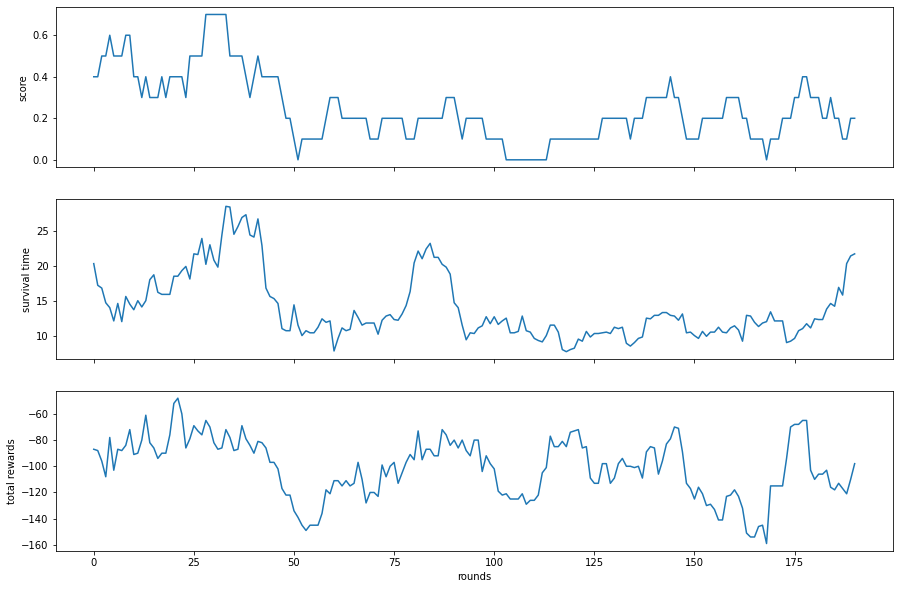

In [6]:
fig, [ax1, ax2, ax3] = plt.subplots(3,1, figsize=(15,10), sharex=True)
ax1.plot(avgdf['score'])
ax1.set_ylabel("score")
ax2.plot(avgdf['survival time'])
ax2.set_ylabel("survival time")
ax3.plot(avgdf['total rewards'])
ax3.set_ylabel("total rewards")
ax3.set_xlabel("rounds")
plt.savefig(destination + title + ".png")

In [7]:
avgdf.corr()

,score,survival time,total rewards
score,1.000000,0.597249,0.559566
survival time,0.597249,1.000000,0.439590
total rewards,0.559566,0.439590,1.000000
